In [1]:
## Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
## Data preprocessing
## Training Image Preprocessing

training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [3]:
## Validation image processing

validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[127.75 123.75 146.75]
   [123.25 119.25 142.25]
   [141.25 137.25 160.25]
   ...
   [ 26.5   32.5   54.5 ]
   [ 25.75  31.75  53.75]
   [ 29.25  35.25  57.25]]

  [[139.25 135.25 158.25]
   [132.75 128.75 151.75]
   [130.75 126.75 149.75]
   ...
   [ 26.25  32.25  54.25]
   [ 32.    38.    60.  ]
   [ 28.    34.    56.  ]]

  [[140.75 136.75 159.75]
   [133.   129.   152.  ]
   [128.   124.   147.  ]
   ...
   [ 26.25  32.25  54.25]
   [ 29.25  35.25  57.25]
   [ 29.25  35.25  57.25]]

  ...

  [[147.5  151.5  180.5 ]
   [151.5  155.5  184.5 ]
   [151.75 155.75 184.75]
   ...
   [115.25 119.25 156.25]
   [113.5  117.5  154.5 ]
   [113.25 117.25 154.25]]

  [[151.5  155.5  184.5 ]
   [149.   153.   182.  ]
   [150.25 154.25 183.25]
   ...
   [114.5  118.5  155.5 ]
   [112.75 116.75 153.75]
   [112.25 116.25 153.25]]

  [[147.25 151.25 180.25]
   [147.75 151.75 180.75]
   [149.5  153.5  182.5 ]
   ...
   [114.   118.   155.  ]
   [112.25 116.25 153.25]
   [108.75 112.75 14

In [6]:
## Building Model

from tensorflow.keras. layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential  

In [7]:
model = Sequential()

In [8]:
## Building convolutional layer

model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\SEC\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25)) #avoid overfitting

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
#Output layer
model.add(Dense(units=38,activation='softmax'))

In [19]:
## Compiling Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [20]:
model.summary()             

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
## Model Training  
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)              

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3603s 2s/step - accuracy: 0.3824 - loss: 2.2056 - val_accuracy: 0.8272 - val_loss: 0.5367
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2968s 1s/step - accuracy: 0.8426 - loss: 0.5011 - val_accuracy: 0.9079 - val_loss: 0.2818
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2910s 1s/step - accuracy: 0.9048 - loss: 0.2866 - val_accuracy: 0.9346 - val_loss: 0.2015
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 10162s 5s/step - accuracy: 0.9357 - loss: 0.1938 - val_accuracy: 0.9371 - val_loss: 0.1992
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3417s 2s/step - accuracy: 0.9502 - loss: 0.1533 - val_accuracy: 0.9556 - val_loss: 0.1489
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3709s 2s/step - accuracy: 0.9626 - loss: 0.1126 - val_accuracy: 0.9465 - val_loss: 0.1792
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4170s 2s/step - accuracy: 0.9691 - loss: 0.0916 - val_accuracy: 0.9639 - val_loss: 0.1215
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 35817s 16s/step - accuracy: 0.975

In [22]:
## Model evaluation on training set
                             
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5296s 2s/step - accuracy: 0.9869 - loss: 0.0387


In [23]:
print(train_loss,train_acc)

0.03488537296652794 0.988377571105957


In [24]:
## model on validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 800s 1s/step - accuracy: 0.9642 - loss: 0.1219


In [25]:
print(val_loss,val_acc)

0.12290318310260773 0.9639768004417419


In [26]:
## Saving Model

model.save("trained_model.keras")

In [28]:
training_history.history

{'accuracy': [0.5882921814918518,
  0.8628209829330444,
  0.9134789109230042,
  0.9411907196044922,
  0.9545202255249023,
  0.9655451774597168,
  0.97247314453125,
  0.9768689274787903,
  0.9790738821029663,
  0.9823742508888245],
 'loss': [1.4035301208496094,
  0.43335145711898804,
  0.26229000091552734,
  0.17893901467323303,
  0.13806253671646118,
  0.10359786450862885,
  0.08371708542108536,
  0.07180403918027878,
  0.06428082287311554,
  0.055419329553842545],
 'val_accuracy': [0.8271682262420654,
  0.9079216718673706,
  0.9345549941062927,
  0.9370589852333069,
  0.9555543065071106,
  0.9465057849884033,
  0.9639198780059814,
  0.961586594581604,
  0.9397336840629578,
  0.9639768004417419],
 'val_loss': [0.5366814732551575,
  0.281756192445755,
  0.20149409770965576,
  0.19915036857128143,
  0.14894281327724457,
  0.17921000719070435,
  0.12148579210042953,
  0.13158923387527466,
  0.20417465269565582,
  0.12290319800376892]}

In [29]:
## Recording History in json
import json
with open("training_hist.json","w") as f:
  json.dump(training_history.history,f)

In [31]:
training_history.history['val_accuracy']

[0.8271682262420654,
 0.9079216718673706,
 0.9345549941062927,
 0.9370589852333069,
 0.9555543065071106,
 0.9465057849884033,
 0.9639198780059814,
 0.961586594581604,
 0.9397336840629578,
 0.9639768004417419]

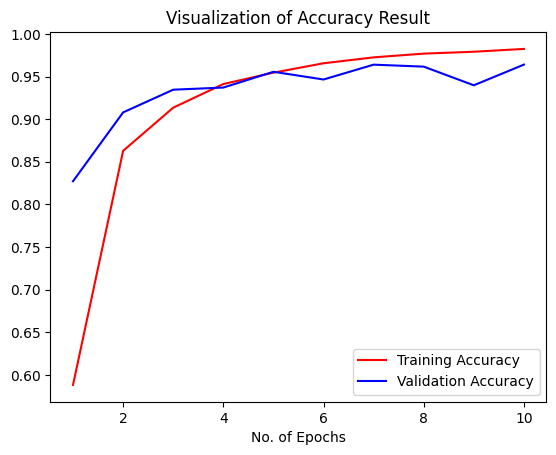

In [30]:
## Accuracy Visualization

epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [45]:
## some other metrics of evaluation

class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [34]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape


17572/17572 ━━━━━━━━━━━━━━━━━━━━ 1012s 58ms/step


(array([[9.9999046e-01, 1.4821461e-07, 4.0787613e-09, ..., 2.6717825e-12,
         2.3131525e-12, 1.8200531e-11],
        [9.9989140e-01, 2.9244619e-08, 1.9512716e-09, ..., 1.2169462e-11,
         1.6038455e-12, 4.3708641e-11],
        [9.9999678e-01, 1.9717458e-08, 3.3338192e-09, ..., 1.4004608e-13,
         5.5277037e-12, 1.2631904e-09],
        ...,
        [8.3760915e-11, 1.7634851e-13, 8.8931396e-10, ..., 1.5471825e-11,
         8.9845319e-12, 9.9999964e-01],
        [8.4654263e-11, 3.9024160e-14, 1.9121865e-10, ..., 2.8093508e-11,
         6.8318550e-12, 1.0000000e+00],
        [1.0232552e-12, 1.6704428e-14, 4.4497250e-14, ..., 5.0124229e-15,
         2.3476173e-12, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [35]:
  predicted_categories = tf.argmax(y_pred,axis=1) 

In [36]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [37]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [38]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.96      0.97       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.94      0.99      0.96       440
                                   Apple___healthy       0.94      0.97      0.96       502
                               Blueberry___healthy       0.95      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.94      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.95      0.

In [43]:
cm = confusion_matrix(y_true,predicted_categories)
cm

array([[485,   1,   1, ...,   0,   0,   0],
       [  1, 488,   1, ...,   0,   0,   0],
       [  0,   0, 437, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 484,   0,   0],
       [  0,   0,   0, ...,   0, 440,   0],
       [  0,   0,   1, ...,   0,   0, 475]])

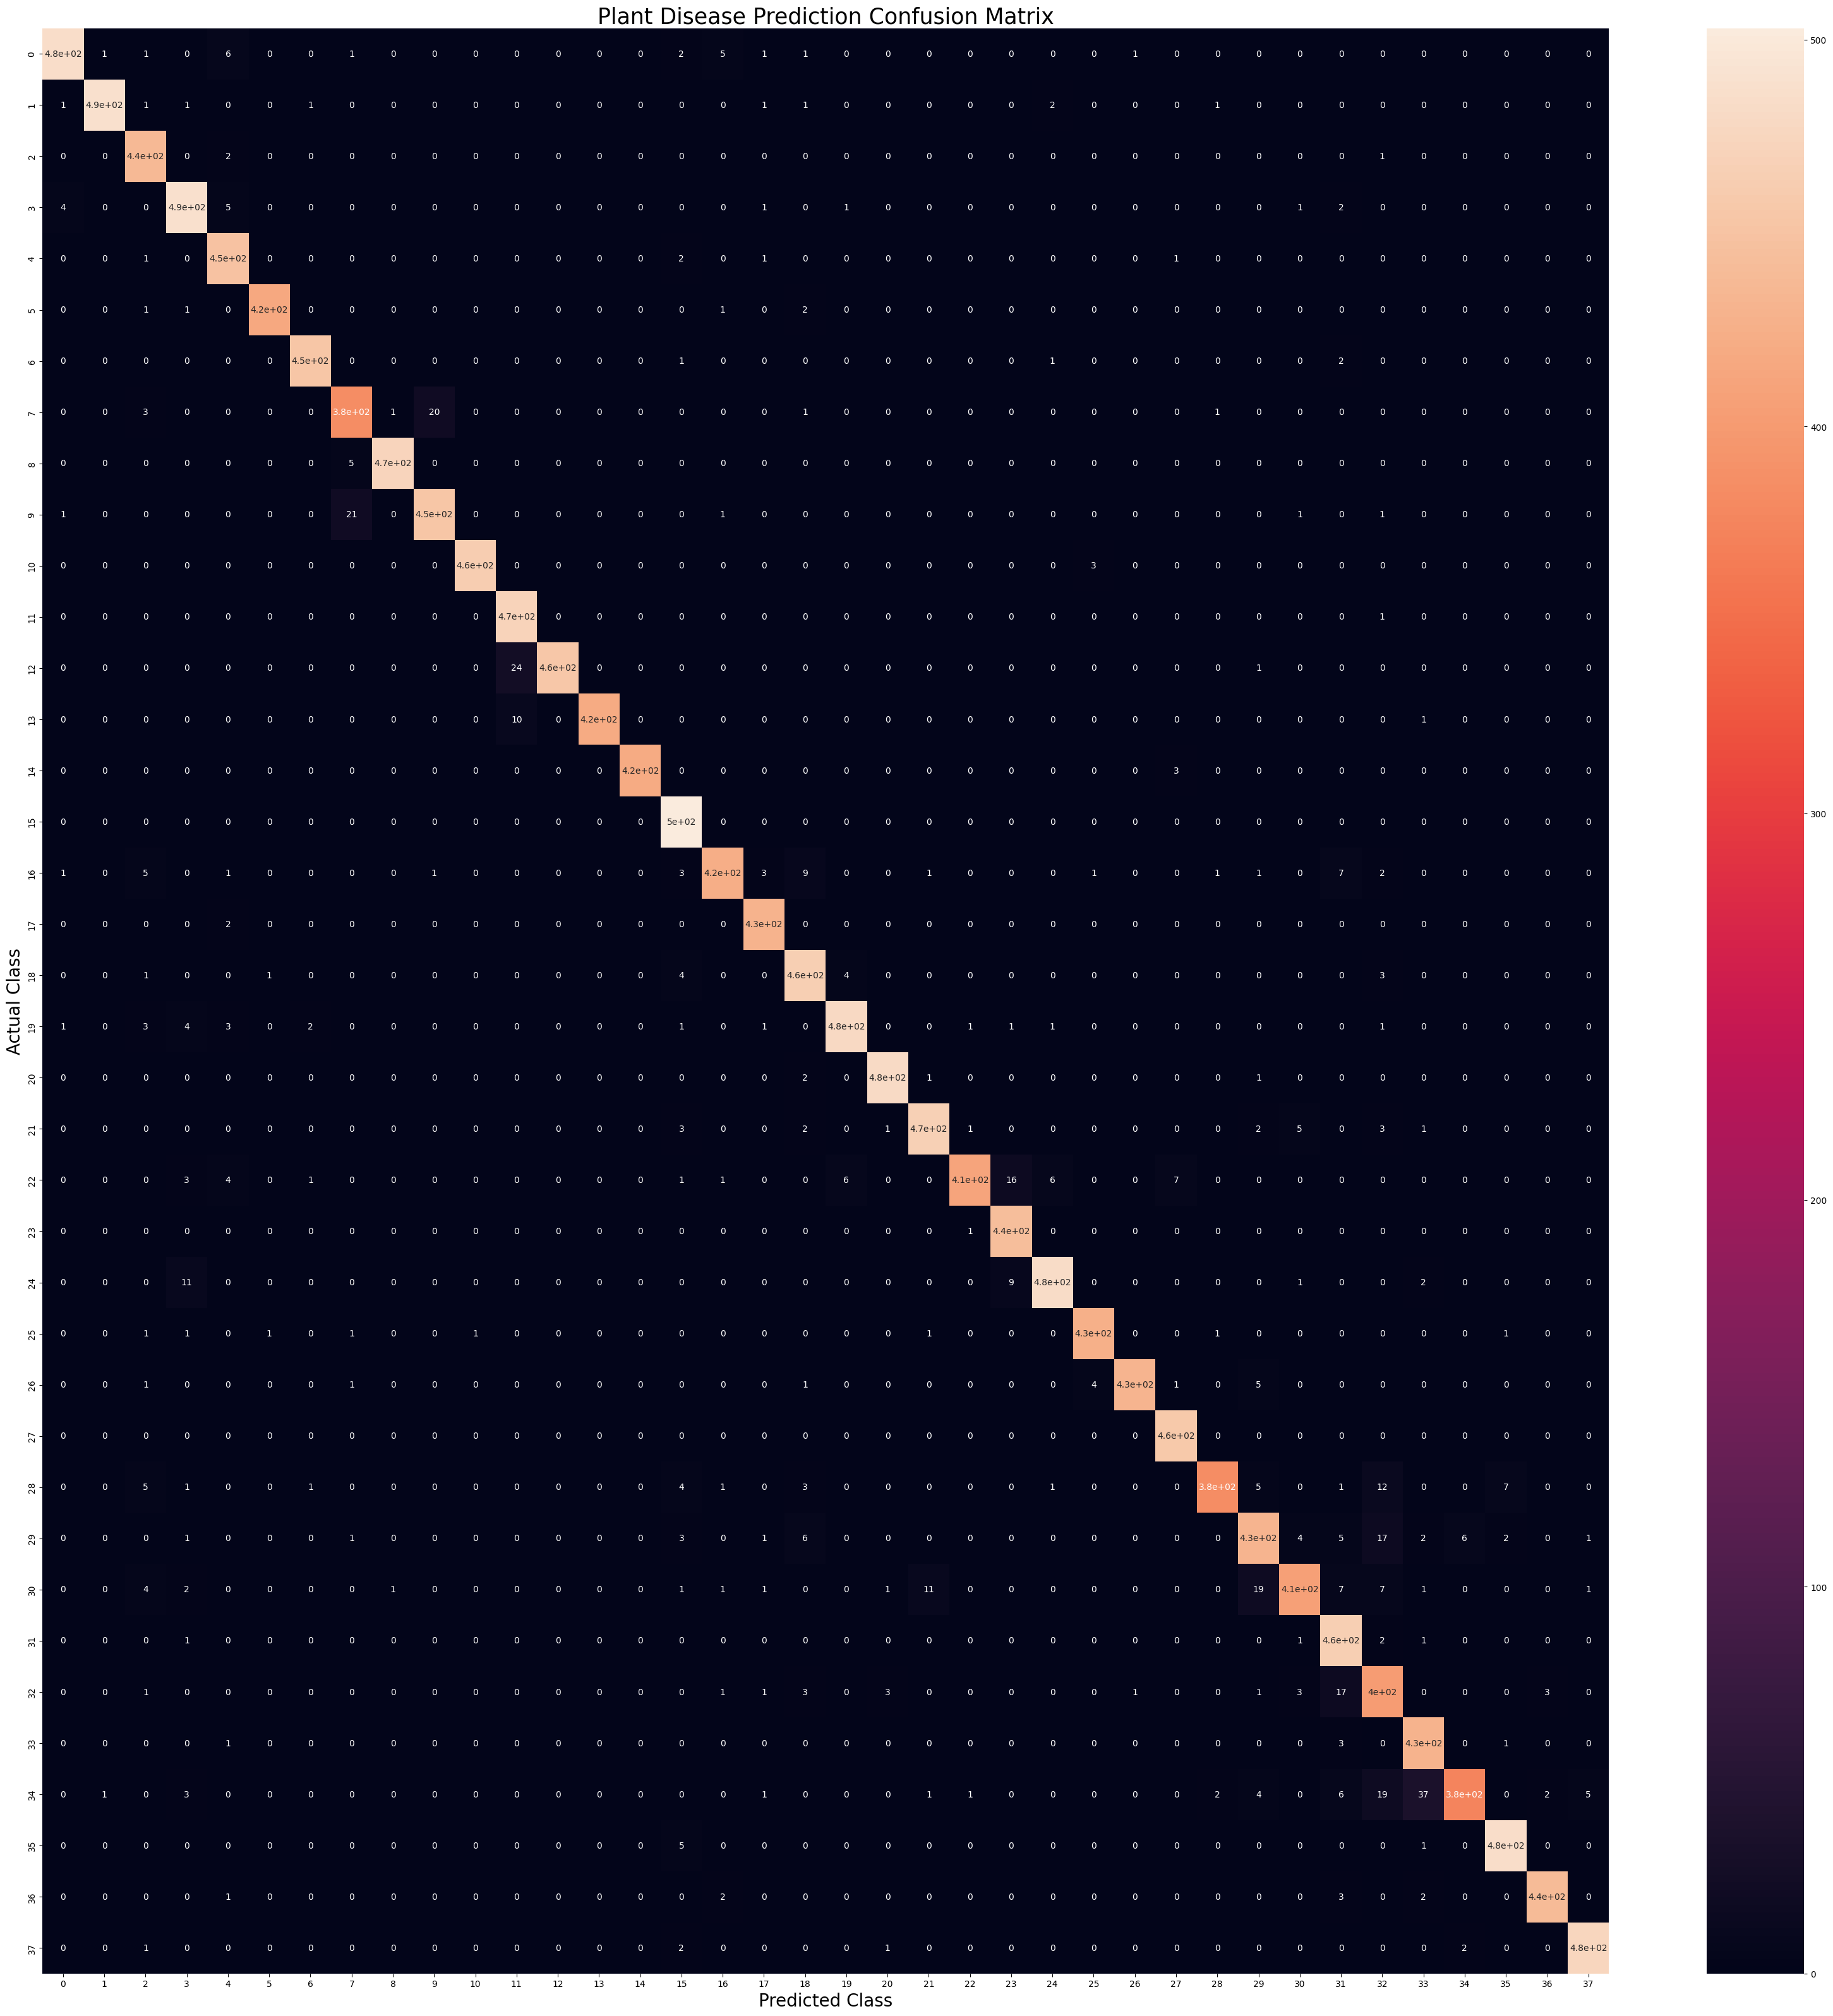

In [44]:
## Confusion Matrix

plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()